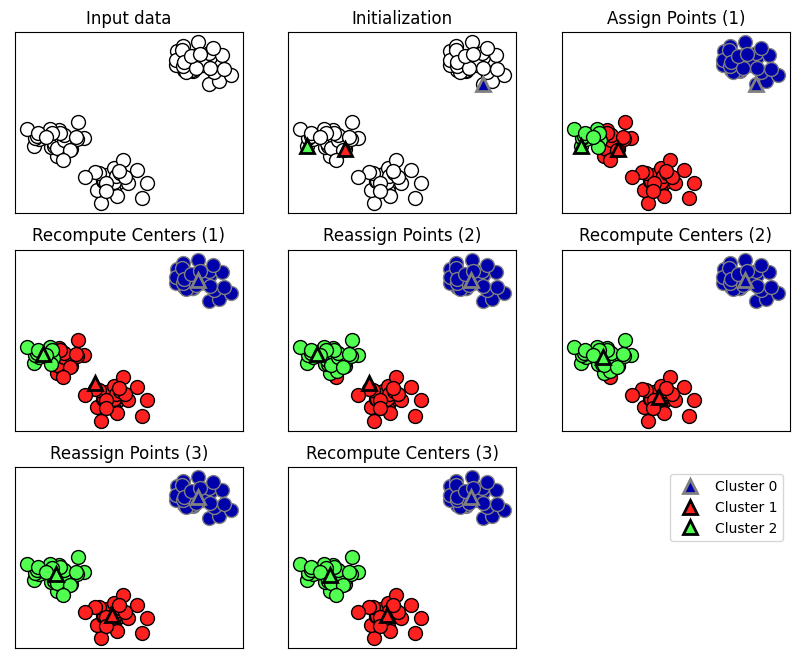

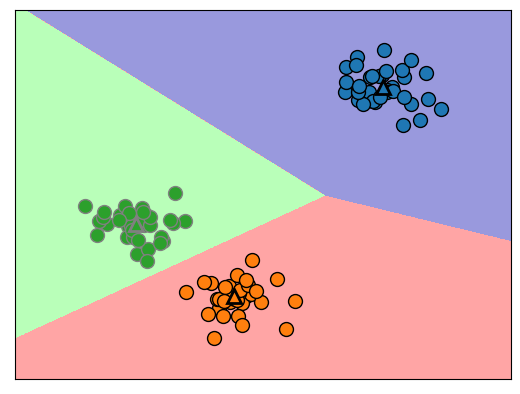

Принадлежность к кластерам:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


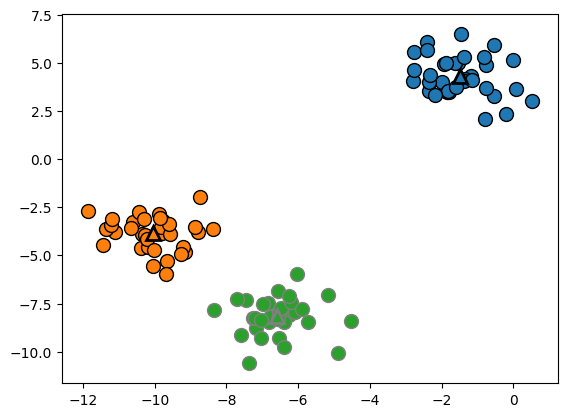

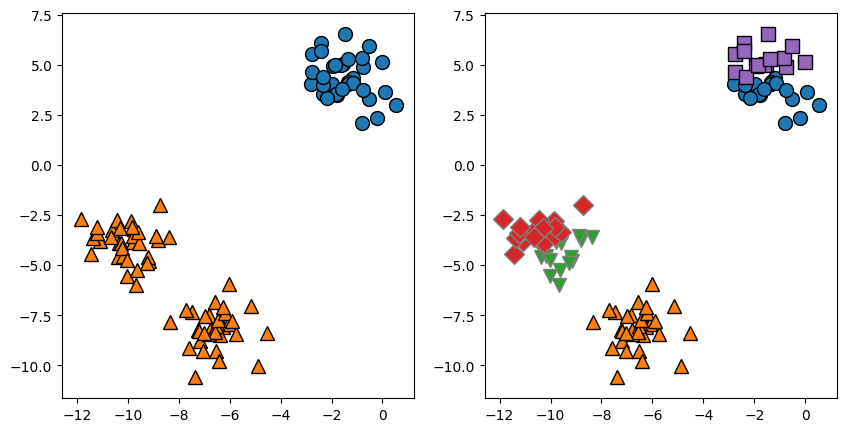

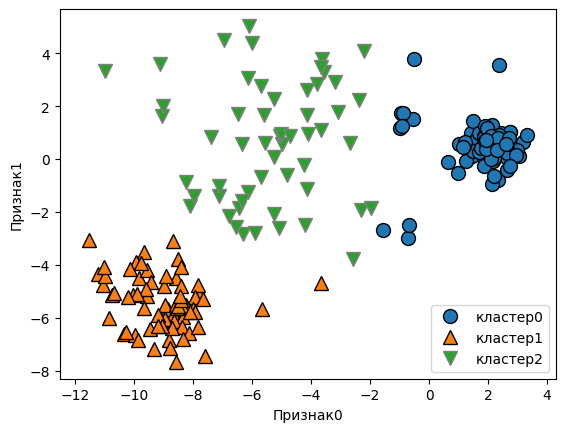

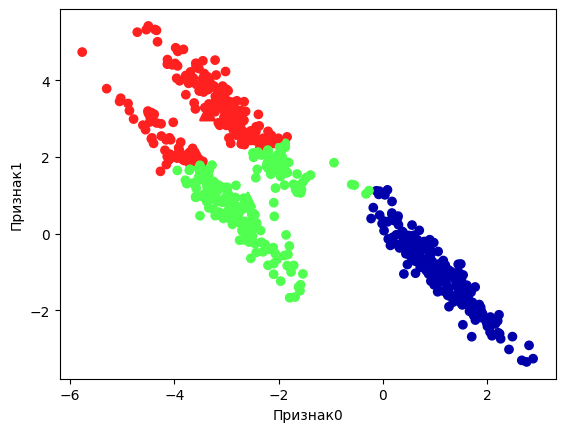

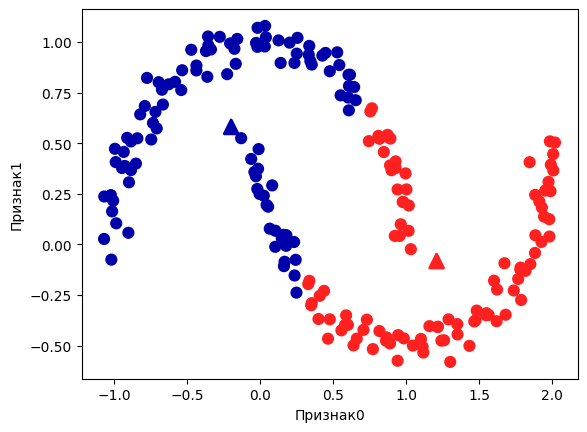

In [1]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

mglearn.plots.plot_kmeans_algorithm()
plt.show()

mglearn.plots.plot_kmeans_boundaries()
plt.show()

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#генерируем синтетические двумерные данные
X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

#строим модель кластеризации
print("Принадлежность к кластерам:\n{}".format(kmeans.labels_))

mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth=2)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10,5))
#использование двух центров кластеров:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])
#использование пяти центров кластеров:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])
plt.show()

X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["кластер0", "кластер1", "кластер2"], loc='best')
plt.xlabel("Признак0")
plt.ylabel("Признак1")
plt.show()

#генерируем случайным образом данные для кластеризации
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

#преобразуем данные так, чтобы они были вытянуты под диагональю
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

#группируем данные в три кластера
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#строим график принадлежностей к кластерам центров кластеров
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Признак0")
plt.ylabel("Признак1")
plt.show()

#генерируем синтетические данные two_moons (на этот раз с меньшим количеством шума)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

#группируем данные в два кластера
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#строим график принадлежностей к кластерам центров кластеров
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Признак0")
plt.ylabel("Признак1")
plt.show()